# **Programming for Data Analysis**
---

**Author: Damien Farrell**

---

## **Project 2: An Analysis of Paleo-Present Climate Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import requests

sns.set_theme()

### **Data Set Components**

1. **Temperature Estimate:**
   - Temperature difference anomaly from the average temperature of the last 1000 years over the past 800,000 years.
   - Temperature estimated from the analysis of deuterium in the ice cores, with various corrections.
     <br>
     <br>

1. **Composite Carbon Dioxide Record:**
   - Composite record of atmospheric carbon dioxide (CO2) levels over the past 800,000 years.
   - Antarctic ice-core records of carbon dioxide extend back 800,000 years at Dome C and over 400,000 years at the Vostok site. Additional shorter recordS from Taylor Dome, another Antarctic location.
     <br>
     <br>

1. **Methane Record (EPICA Dome C Ice Core):**
   - Detailed methane record to 800,000 years before AD 1950.
     <br>
     <br>

1. **Dublin Airport Hourly Data:**
   - Detailed weather data from Dublin airport.
     <br>
     <br>



Composite Rainfall Time Series from 1711-2016 for Ireland
https://www.met.ie/climate/available-data/long-term-data-sets/

IOI_1711_SERIES 

Reconstruction of a long-term historical daily maximum and minimum air temperature network dataset for Ireland (1831-1968)
https://www.met.ie/climate/available-data/long-term-data-sets/

Valentia-Observatory-telegraphic-reporting-station_1921-1943
Valentia-Observatory-telegraphic-reporting-station_1850-1920
Valentia-Observatory_second-order-station_1883-1909


Observatory Monthly Data
https://data.gov.ie/dataset/valentia-observatory-monthly-data
mly2275





### **Antarctic Datasets**

In [2]:
present_year = 1950

Making a full year range as it impossible to use date.time or period on a time period this length. Cannot resample either as it valid with DatetimeIndex, TimedeltaIndex or PeriodIndex.

In [3]:
min_year = -850_000
max_year = 2100
year_range = pd.Series(range(min_year, max_year + 1), name="year")

#### **Antarctic Temperature**
Extract temperature data from NOAA EDC3 2007 and convert into a DataFrame

In [4]:
url = "https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt"
response = requests.get(url)  # Generate response object
text = response.text  # Return the HTML of webpage as string
data = text

# The pattern to find the start of the table
pattern = re.compile(r"Bag\s+ztop\s+Age\s+Deuterium\s+Temperature", re.IGNORECASE)

# Extract the data starting from the match
match = pattern.search(data)
start_index = match.start()
table_data = data[start_index:]

# Convert the table_data to a list of lines
table_lines = table_data.strip().split("\n")

# Extract column names and data
columns = table_lines[0].split()
rows = [line.split() for line in table_lines[1:]]

# Create a Antarctic Temperature DataFrame
antarctic_temp_df = pd.DataFrame(rows, columns=columns)
numeric_columns = ["Bag", "ztop", "Age", "Deuterium", "Temperature"]
antarctic_temp_df[numeric_columns] = antarctic_temp_df[numeric_columns].apply(
    pd.to_numeric, errors="coerce"
)

# Transforming the Antarctic Temperature DataFrame
antarctic_temp_df = antarctic_temp_df.dropna().reset_index(drop=True)
antarctic_temp_df.drop(["Bag", "ztop", "Deuterium"], axis=1, inplace=True)
antarctic_temp_df["year"] = present_year - antarctic_temp_df["Age"].astype(int)
antarctic_temp_df.drop(["Age"], axis=1, inplace=True)
antarctic_temp_df.rename(columns={"Temperature": "temp (°C)"}, inplace=True)
antarctic_temp_df = antarctic_temp_df.drop_duplicates(subset="year")

#### **Antarctic Carbon Dioxide**
Extract temperature data from NOAA EDC3 2007 and convert into a DataFrame dasfasdffds change

In [5]:
antarctic_carbon_dioxide_df = pd.read_excel(
    "./data/CO2/grl52461-sup-0003-supplementary.xls",
    sheet_name="CO2 Composite",
    skiprows=14,
)

# Transforming the Antarctic CO2 DataFrame
antarctic_carbon_dioxide_df.drop(["sigma mean CO2 (ppmv)"], axis=1, inplace=True)
antarctic_carbon_dioxide_df["year"] = present_year - antarctic_carbon_dioxide_df[
    "Gasage (yr BP) "
].astype(int)
antarctic_carbon_dioxide_df.drop(["Gasage (yr BP) "], axis=1, inplace=True)
antarctic_carbon_dioxide_df = antarctic_carbon_dioxide_df.drop_duplicates(subset="year")

#### **Antarctic Methane**
Extract temperature data from NOAA EDC3 2007 and convert into a DataFrame dasfasdffds change

In [6]:
antarctic_methane_df1 = pd.read_excel(
    "./data/CH4/Historic_Greenhouse_gas_concentrations_ice_core_data spreadsheet.xlsx",
    sheet_name="Law Dome_CH4_CO2_0-2000 AD",
    skiprows=0,
)

antarctic_methane_df2 = pd.read_excel(
    "./data/CH4/Historic_Greenhouse_gas_concentrations_ice_core_data spreadsheet.xlsx",
    sheet_name="CH4_EDC",
    skiprows=1,
)

# Transforming the Antarctic Methane DataFrame 1
antarctic_methane_df1.rename(columns={"Year AD": "year", "CH4  (ppb)": "CH4 (ppbv)", "CO2  (ppm)": "CO2 (ppmv)"}, inplace=True)
antarctic_methane_df1 = antarctic_methane_df1.drop_duplicates(subset="year")

# Transforming the Antarctic Methane DataFrame 2
antarctic_methane_df2.drop(["[m]", "[ppbv].1", "[b, g]"], axis=1, inplace=True)
antarctic_methane_df2["year"] = present_year - antarctic_methane_df2["[yrs BP 1950]"].astype(int)
antarctic_methane_df2.drop(["[yrs BP 1950]"], axis=1, inplace=True)
antarctic_methane_df2.rename(columns={"[ppbv]": "CH4 (ppbv)"}, inplace=True)
antarctic_methane_df2 = antarctic_methane_df2.drop_duplicates(subset="year")

# Merging Methane DataFrame 1 & 2
antarctic_methane_df = pd.merge(antarctic_methane_df1, antarctic_methane_df2, on="year", how="left")
antarctic_methane_df['CH4 (ppbv)'] = antarctic_methane_df['CH4 (ppbv)_x'].combine_first(antarctic_methane_df['CH4 (ppbv)_y'])
antarctic_methane_df.drop(['CH4 (ppbv)_x', 'CH4 (ppbv)_y'], axis=1, inplace=True)

#### **Composite Antarctic DataFrame**

In [7]:
antarctic_df = pd.merge(year_range, antarctic_temp_df, on="year", how="left")
antarctic_df = pd.merge(antarctic_df, antarctic_carbon_dioxide_df, on="year", how="left")

antarctic_df = pd.merge(antarctic_df, antarctic_methane_df, on="year", how="left")
antarctic_df = antarctic_df.set_index("year")
antarctic_df = antarctic_df.sort_index()

# Merging CO2 Columns
antarctic_df['CO2 (ppmv)'] = antarctic_df['CO2 (ppmv)_x'].combine_first(antarctic_df['CO2 (ppmv)_y'])
antarctic_df.drop(['CO2 (ppmv)_x', 'CO2 (ppmv)_y'], axis=1, inplace=True)

# Filter the dataset to remove rows where all of temp, CO2, and CH4 are NaN
antarctic_df = antarctic_df.dropna(subset=["temp (°C)", "CO2 (ppmv)", "CH4 (ppbv)"], how="all")

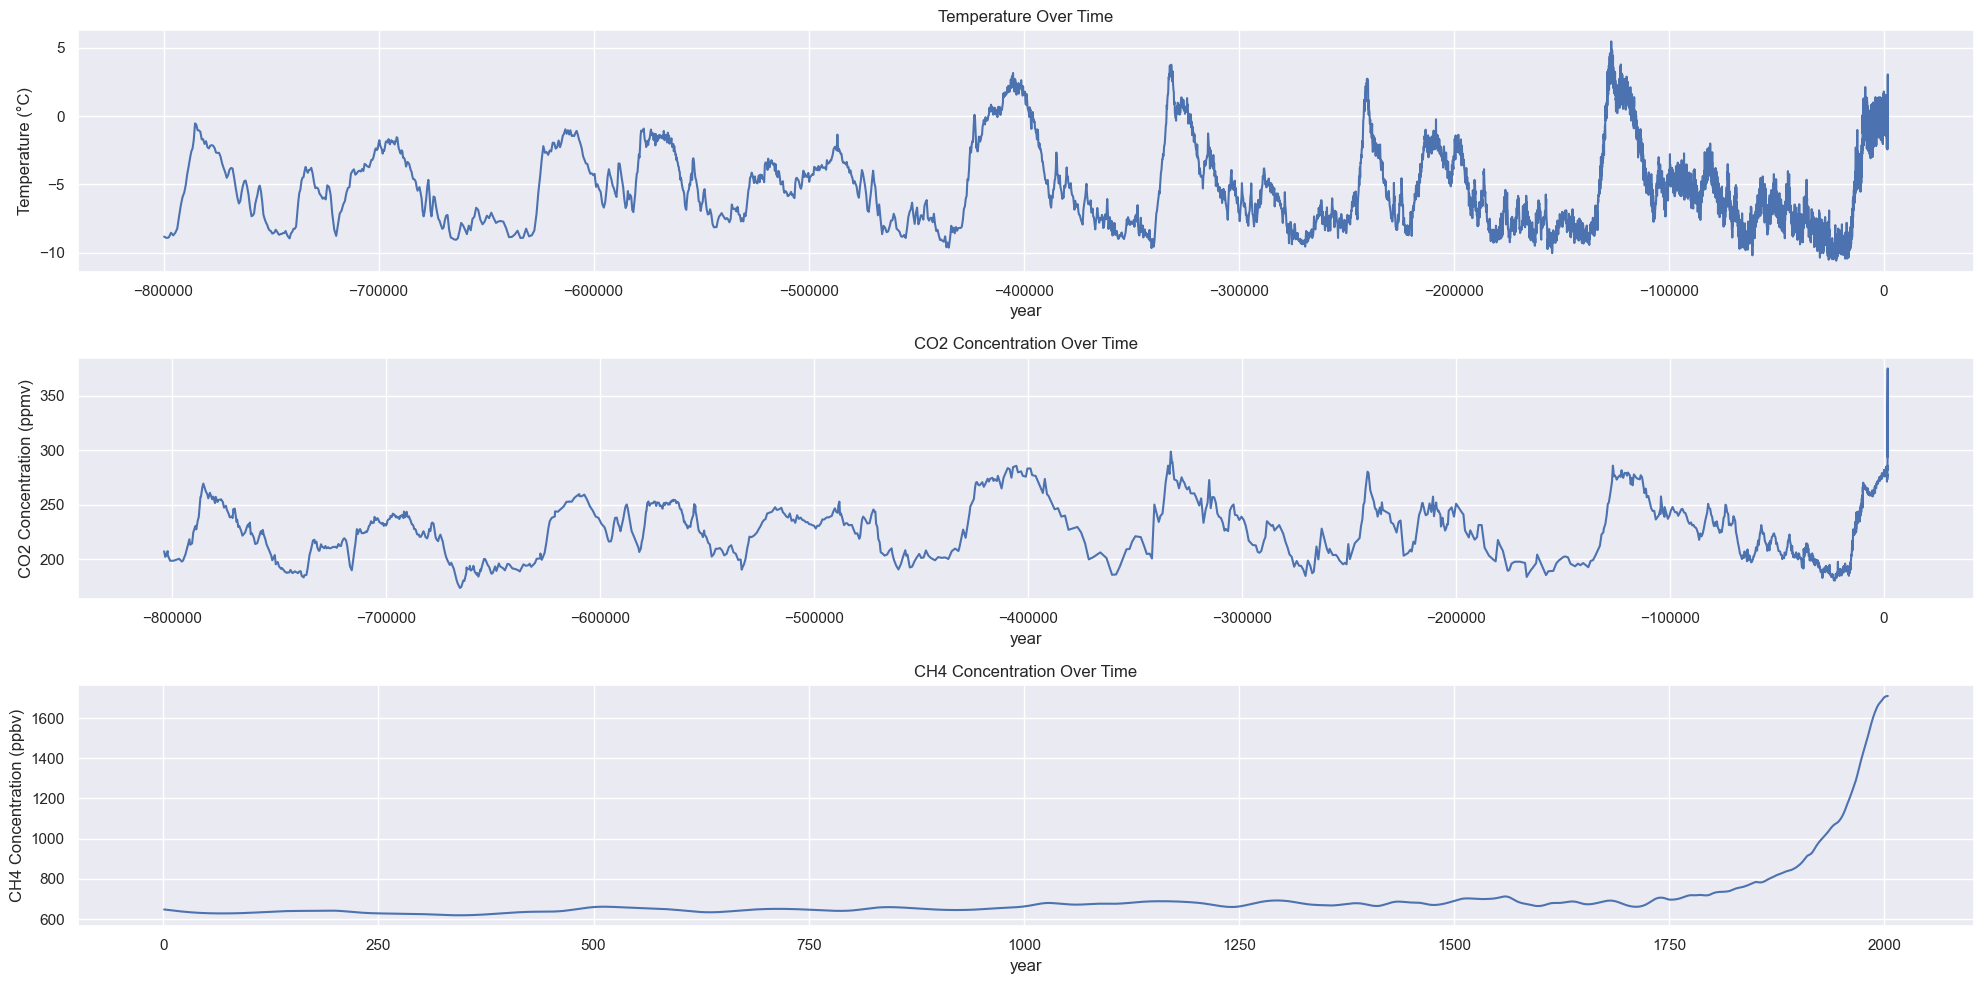

In [8]:
plt.figure(figsize=(20, 10))

# Temperature
plt.subplot(3, 1, 1)
sns.lineplot(data=antarctic_df, x="year", y="temp (°C)")
plt.title("Temperature Over Time")
plt.ylabel("Temperature (°C)")

# CO2
plt.subplot(3, 1, 2)
sns.lineplot(data=antarctic_df, x="year", y="CO2 (ppmv)")
plt.title("CO2 Concentration Over Time")
plt.ylabel("CO2 Concentration (ppmv)")

# CH4
plt.subplot(3, 1, 3)
sns.lineplot(data=antarctic_df, x="year", y="CH4 (ppbv)")
plt.title("CH4 Concentration Over Time")
plt.ylabel("CH4 Concentration (ppbv)")
plt.tight_layout();

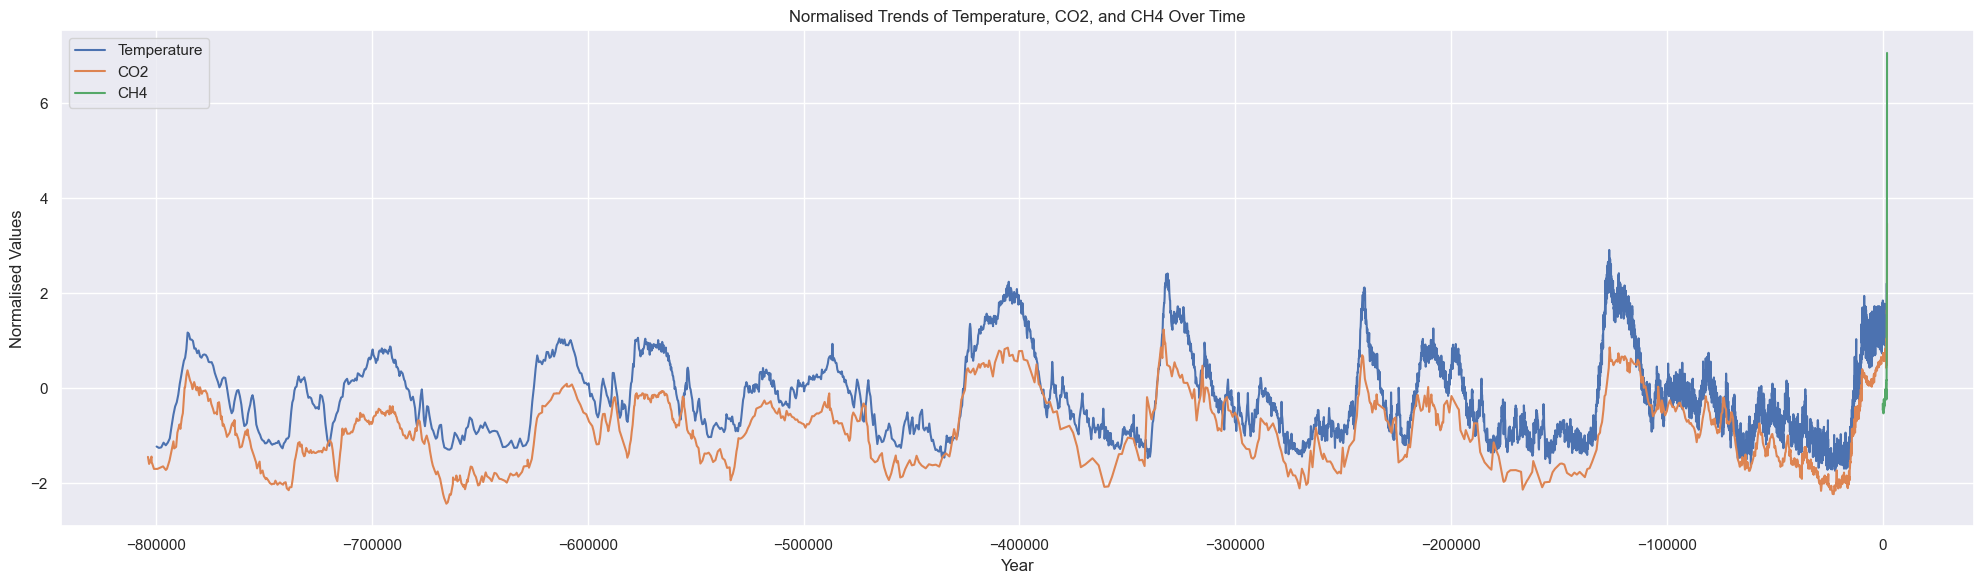

In [9]:
plt.figure(figsize=(20, 6))

# Normalising the data for overlaying
normalised_data = (
    antarctic_df[["temp (°C)", "CO2 (ppmv)", "CH4 (ppbv)"]] - antarctic_df[["temp (°C)", "CO2 (ppmv)", "CH4 (ppbv)"]].mean()) / antarctic_df[["temp (°C)", "CO2 (ppmv)", "CH4 (ppbv)"]].std()

# Overlaying the plots
sns.lineplot(data=normalised_data, x=antarctic_df.index, y="temp (°C)", label="Temperature")
sns.lineplot(data=normalised_data, x=antarctic_df.index, y="CO2 (ppmv)", label="CO2")
sns.lineplot(data=normalised_data, x=antarctic_df.index, y="CH4 (ppbv)", label="CH4")

plt.title("Normalised Trends of Temperature, CO2, and CH4 Over Time")
plt.ylabel("Normalised Values")
plt.xlabel("Year")
plt.legend()
plt.tight_layout();

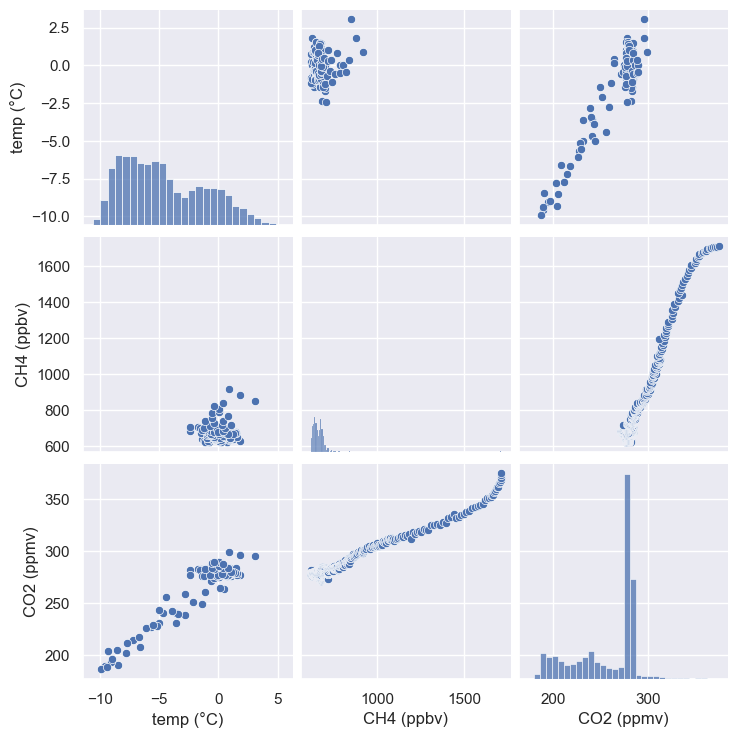

In [14]:
sns.pairplot(antarctic_df);

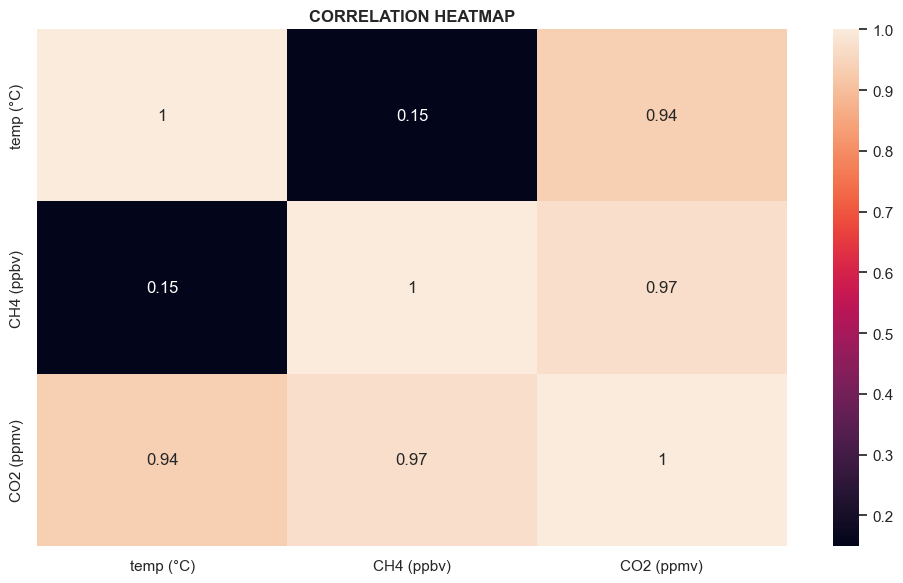

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(antarctic_df.corr(), annot=True)
plt.title("CORRELATION HEATMAP", fontweight="bold")
plt.tight_layout()

### **Irish Weather Datasets**

Importing, cleaning, and transforming the Irish temperature weather data.

In [10]:
irish_weather_df = pd.read_csv(
    "./data/irish/mly2275.csv",
    sep=",",
    skiprows=19,
    usecols=["year", "month", "meant", "rain"],
)

# Transforming the Irish Weather DataFrame
irish_weather_df["year-month"] = irish_weather_df[["year", "month"]].apply(
    lambda row: "-".join(row.values.astype(str)), axis=1
)

In [11]:
irish_weather_df

,year,month,meant,rain,year-month
0,1939,10,10.0,105.5,1939-10
1,1939,11,10.3,251.9,1939-11
2,1939,12,6.0,116.9,1939-12
3,1940,1,5.8,163.8,1940-1
4,1940,2,7.9,179.6,1940-2
...,...,...,...,...,...
1005,2023,7,15.3,170.3,2023-7
1006,2023,8,15.9,177.1,2023-8
1007,2023,9,15.6,189.3,2023-9
1008,2023,10,12.8,253.1,2023-10


In [22]:
# Reading in the csv file
irish_temp_df1 = pd.read_csv(
    "./data/irish/Valentia-Observatory_second-order-station_1883-1909.csv",
    sep=",",
    encoding="ISO-8859-1",
)

# Transforming the dataset
irish_temp_df1.drop(["Max (°F)", "Min (°F)"], axis=1, inplace=True)
irish_temp_df1["meant"] = irish_temp_df1[["Max (°C)", "Min (°C)"]].mean(axis=1)
irish_temp_df1.drop(["Max (°C)", "Min (°C)"], axis=1, inplace=True)
irish_temp_df1.rename(
    columns={"Year": "year", "Month": "month", "Day ": "day"}, inplace=True
)

irish_temp_df1["date"] = pd.to_datetime(
    irish_temp_df1[["year", "month", "day"]], errors="coerce"
)
irish_temp_df1 = irish_temp_df1.drop(["year", "month", "day"], axis=1)
irish_temp_df1.set_index("date", inplace=True)

# Downsample to yearly
resample = irish_temp_df1.resample("Y")
irish_temp_df1 = resample.mean()

# Reading in the csv file
irish_temp_df2 = pd.read_csv(
    "./data/irish/Valentia-Observatory-telegraphic-reporting-station_1850-1920.csv",
    sep=",",
    encoding="ISO-8859-1",
)

# Transforming the dataset
irish_temp_df2.drop(["Max (°F)", "Min (°F)"], axis=1, inplace=True)
irish_temp_df2["meant"] = irish_temp_df2[["Max (°C)", "Min (°C)"]].mean(axis=1)
irish_temp_df2.drop(["Max (°C)", "Min (°C)"], axis=1, inplace=True)
irish_temp_df2.rename(
    columns={"Year": "year", "Month": "month", "Day": "day"}, inplace=True
)
irish_temp_df2["date"] = pd.to_datetime(
    irish_temp_df2[["year", "month", "day"]], errors="coerce"
)
irish_temp_df2 = irish_temp_df2.drop(["year", "month", "day"], axis=1)
irish_temp_df2.set_index("date", inplace=True)

# Downsample to yearly
resample = irish_temp_df2.resample("Y")
irish_temp_df2 = resample.mean()

# Reading in the csv file
irish_temp_df3 = pd.read_csv(
    "./data/irish/Valentia-Observatory-telegraphic-reporting-station_1921-1943.csv",
    sep=",",
    encoding="ISO-8859-1",
)

# Transforming the dataset
irish_temp_df3.drop(
    ["Max at 7h (°F)", "Min at 7h (°F)", "Max at 18h (°F)", "Min at 18h (°F)"],
    axis=1,
    inplace=True,
)
irish_temp_df3["meant"] = irish_temp_df3[
    ["Max at 7h (°C)", "Min at 7h (°C)", "Max at 18h (°C)", "Min at 18h (°C)"]
].mean(axis=1)
irish_temp_df3.drop(
    ["Max at 7h (°C)", "Min at 7h (°C)", "Max at 18h (°C)", "Min at 18h (°C)"],
    axis=1,
    inplace=True,
)
irish_temp_df3.rename(
    columns={"Year": "year", "Month": "month", "Daily": "day"}, inplace=True
)
irish_temp_df3["date"] = pd.to_datetime(
    irish_temp_df3[["year", "month", "day"]], errors="coerce"
)
irish_temp_df3 = irish_temp_df3.drop(["year", "month", "day"], axis=1)
irish_temp_df3.set_index("date", inplace=True)

# Downsample to yearly
resample = irish_temp_df3.resample("Y")
irish_temp_df3 = resample.mean()

# Combining the datasets
irish_temp_df = pd.concat([irish_temp_df1, irish_temp_df2, irish_temp_df3])

In [21]:
irish_temp_df

,meant
date,
1883-12-31,10.238219
1884-12-31,10.658197
1885-12-31,10.090822
1886-12-31,10.127534
1887-12-31,10.343151
...,...
1939-12-31,10.717603
1940-12-31,10.874454
1941-12-31,10.360137


Text Analysis

https://guides.library.upenn.edu/penntdm/python/import_files#:~:text=Importing%20Files%20(Web%20Scraping)&text=The%20get()%20function%20in,it%20in%20a%20Python%20object.

Parsing a text file into a pandas DataFrame

https://codereview.stackexchange.com/questions/257729/parsing-a-text-file-into-a-pandas-

Pandas Timestamp Limitations

https://calmcode.io/til/pandas-timerange.html#:~:text=Since%20pandas%20represents%20timestamps%20in,limited%20to%20approximately%20584%20years.

How To Resample and Interpolate Your Time Series Data With Python

https://machinelearningmastery.com/resample-interpolate-time-series-data-python/

pandas.read_excel

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html


Compilation of improved CH4 data derived from the European Project for Ice Coring in Antarctica (EPICA) Dome C

https://doi.pangaea.de/10.1594/PANGAEA.914908


An optimized multi-proxy, multi-site Antarctic ice and gas orbital chronology (AICC2012): 120–800 ka

https://cp.copernicus.org/articles/9/1715/2013/


How to concatenate multiple column values into a single column in Pandas dataframe

https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-pandas-datafra

pandas.DataFrame.merge

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

Historic greenhouse gas concentrations from Antarctic ice core sampling

https://www.ansto.gov.au/historic-greenhouse-gases

Normalization Formula: How To Use It on a Data Set

https://machinelearningmastery.com/normalize-standardize-time-series-data-python/

***
# End